2023-10-03 09:23:36.530062: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-03 09:23:36.554166: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 09:23:36.647754: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 09:23:36.648214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 09:23:37.483311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

5


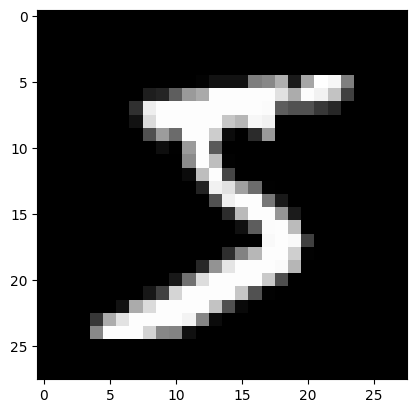

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import math

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

plt.imshow(train_images[0], interpolation="nearest",cmap="gray")
print(train_labels[0])




class neuralnet:

    def __init__(self, numinputs, numoutputs, errorfunc="MSE"):

        self.numinputs = numinputs
        self.numoutputs = numoutputs
        self.errorfunc = errorfunc
        
        self.biases = np.random.default_rng().random(self.numoutputs)
        self.weights = np.random.default_rng().random((self.numoutputs, self.numinputs))

    def evaluate(self, inputs):
            try:
                output = self.weights @ inputs + self.biases
                return output
            except:
                print("Dimension mismatch!")

    def computeerror(self, outputs, trueoutputs):
         if self.errorfunc == "MSE":
            pass
         

         if self.errorfunc == "CrossEntropy":
            sum = 0
            for i in range(0, len(outputs)):
                sum += -trueoutputs[i]*math.log2(outputs[i])
            return sum
              

         



In [12]:
MyNeuralNet = neuralnet(784,10)
test1 = np.random.default_rng().random(784)

MyNeuralNet.evaluate(test1)


array([193.04718293, 193.27476388, 190.61200436, 198.62617653,
       195.52217258, 201.13442827, 193.99978066, 198.67835004,
       194.87877139, 204.54418108])

In [8]:
print(MyNeuralNet.biases)

[0.73835717 0.09554734 0.23160377 0.48765978 0.39533229 0.49924819
 0.71748722 0.43501056 0.36871492 0.0652077 ]


In [17]:

print(train_images[0])
train1flat = train_images[0].flatten()
print(len(train1flat))

MyNeuralNet.evaluate(train1flat)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

array([12587.78949241, 14423.55803306, 12721.80081735, 13952.31824978,
       13618.08646918, 14109.19782533, 13903.74661992, 14332.69599112,
       13274.82260772, 14829.02715935])

In [25]:
train1converted = train_images[0].astype(float)/255
print(train1converted[20])

MyNeuralNet.evaluate(train1converted.flatten())

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.09411765 0.44705882
 0.86666667 0.99215686 0.99215686 0.99215686 0.99215686 0.78823529
 0.30588235 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


array([49.97501473, 56.76272069, 50.42941251, 55.62817001, 54.28410539,
       56.30054884, 55.19160726, 56.29922904, 52.5972755 , 58.25347608])

In [26]:
print(MyNeuralNet.weights[0])

[0.41672361 0.5136382  0.50385447 0.72451633 0.56789584 0.44384644
 0.1984044  0.48524081 0.46961551 0.56155606 0.23530041 0.53424386
 0.31946355 0.67302827 0.05035832 0.66516931 0.22149033 0.26328539
 0.61875521 0.6725908  0.60475662 0.2490647  0.42544319 0.40754792
 0.81327824 0.75980894 0.81878425 0.6120839  0.98412533 0.95728469
 0.98843513 0.84835752 0.98912614 0.67864999 0.14434209 0.24402164
 0.39165774 0.72150533 0.51620598 0.52694484 0.35272956 0.30794896
 0.94394752 0.64650077 0.24700256 0.98830052 0.25528537 0.00965429
 0.52754371 0.16922278 0.77315411 0.11458861 0.40949241 0.80950241
 0.93233711 0.11741963 0.20431621 0.13415428 0.97012031 0.9703365
 0.91498432 0.98277294 0.43922289 0.33301731 0.31519663 0.63344749
 0.36617925 0.2076625  0.87751793 0.77797794 0.54432523 0.25567167
 0.40475118 0.01278671 0.94560712 0.87163666 0.92737767 0.20944387
 0.69381934 0.28970245 0.34222428 0.53541938 0.73472482 0.20486314
 0.1936232  0.60604829 0.75341726 0.4787971  0.92574969 0.36865